# SEECS Parking Simulation Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Loading Data from file

In [3]:
# read text file into pandas DataFrame
df = pd.read_csv("Non Optimal.txt", sep="\t")
df_op = pd.read_csv("Optimal.txt", sep="\t")


## Data Preparation and Cleaning

- Loading the file using pandas

- Fix any missing or incorrect values

In [4]:

cleaned_df = df.copy()
cleaned_df.drop('Car ID', inplace=True, axis=1)
cleaned_df.drop('Unnamed: 26', inplace=True, axis=1)

cleaned_df.drop(cleaned_df[cleaned_df['tFree'] == 0].index, inplace = True)


cleaned_df_op = df_op.copy()
cleaned_df_op.drop('Car ID', inplace=True, axis=1)
cleaned_df_op.drop('Unnamed: 26', inplace=True, axis=1)

cleaned_df_op.drop(cleaned_df_op[cleaned_df_op['tFree'] == 0].index, inplace = True)

## Statistical Analysis

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = cleaned_df.select_dtypes(include=numerics)

numeric_df_op = cleaned_df_op.select_dtypes(include=numerics)

numeric_df['tFill'] = 100 - numeric_df['tFree']
numeric_df_op['tFill'] = 100 - numeric_df_op['tFree']

numeric_df.tFill

0        8
1       23
2       22
3       10
4       22
        ..
5464    53
5465    51
5467    53
5468    51
5470    49
Name: tFill, Length: 5295, dtype: int64


## Plotting histogram for idle vehicle during one day

In [6]:
# Sorting the data
numeric_df = numeric_df.sort_values(['EntHr', 'EntMin'], ascending=[True, True])

numeric_df_op = numeric_df_op.sort_values(['EntHr', 'EntMin'], ascending=[True, True])

In [7]:
hours = sorted(list(df['EntHr'].unique()))  # separating unique hours
sum_of_idleVehicles = list(np.zeros(len(hours)))  # creating an empty array for storing sum of idle vehicles in each hour

for hour in range(len(hours)):
    sum_of_idleVehicles[hour] = numeric_df[numeric_df['EntHr'] == hours[hour]]['IdleVeh'].sum()
    
sum_of_idleVehicles_op = list(np.zeros(len(hours)))  # creating an empty array for storing sum of idle vehicles in each hour

for hour in range(len(hours)):
    sum_of_idleVehicles_op[hour] = numeric_df_op[numeric_df_op['EntHr'] == hours[hour]]['IdleVeh'].sum()
    
print(sum_of_idleVehicles)
print(sum_of_idleVehicles_op)

[3333, 7996, 7806, 3898, 3462, 6937, 11248, 10672, 5969, 8315, 8342, 2130]
[2663, 6664, 3958, 2702, 2610, 4528, 6219, 4074, 2333, 4819, 3164, 779]


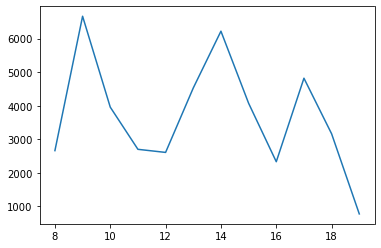

In [8]:
plt.plot(hours, sum_of_idleVehicles_op)

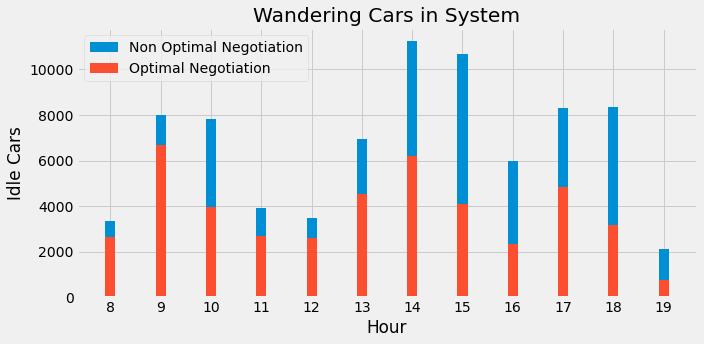

In [9]:
# plotting histogram for idle vehicle count per each hour
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,5))

plt.bar(hours, sum_of_idleVehicles, width=0.2, label='Non Optimal Negotiation')
plt.bar(hours, sum_of_idleVehicles_op, width=0.2, label='Optimal Negotiation')


plt.legend()
plt.xticks(ticks=hours)
plt.xlabel("Hour")
plt.ylabel("Idle Cars")
plt.title("Wandering Cars in System")
plt.tight_layout()
plt.show() 

In [10]:
numeric_df.IdleVeh.sum()

80108

In [11]:
numeric_df_op.IdleVeh.sum()

44513

In [12]:
hours = sorted(list(df['EntHr'].unique()))  # separating unique hours
sum_of_profits = list(np.zeros(len(hours)))  # creating an empty array for storing sum of idle vehicles in each hour

for hour in range(len(hours)):
    sum_of_profits[hour] = numeric_df[numeric_df['EntHr'] == hours[hour]]['TBill'].sum()
    
    
hours = sorted(list(df['EntHr'].unique()))  # separating unique hours
sum_of_profits_op = list(np.zeros(len(hours)))  # creating an empty array for storing sum of idle vehicles in each hour

for hour in range(len(hours)):
    sum_of_profits_op[hour] = numeric_df_op[numeric_df_op['EntHr'] == hours[hour]]['TBill'].sum()
    
print(hours)
print(sum_of_profits)
print(sum_of_profits_op)

[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[78415, 87362, 81969, 64145, 69763, 80309, 90752, 92265, 62585, 38723, 17094, 1166]
[60290, 86966, 63692, 66568, 57029, 70527, 71609, 61825, 38510, 33027, 11075, 1228]


#### Free spaces comparison

[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[30119, 30718, 23934, 16463, 17292, 22012, 22079, 19940, 16580, 19076, 17995, 14195]
[26049, 30116, 18707, 17191, 16774, 20466, 19831, 17362, 15673, 21292, 17420, 12737]


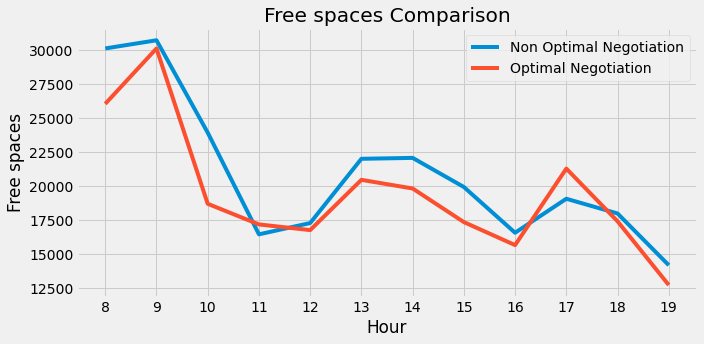

In [16]:
hours = sorted(list(df['EntHr'].unique()))  # separating unique hours
sum_of_free = list(np.zeros(len(hours)))  # creating an empty array for storing sum of idle vehicles in each hour

for hour in range(len(hours)):
    sum_of_free[hour] = numeric_df[numeric_df['EntHr'] == hours[hour]]['tFree'].sum()
    
    
hours = sorted(list(df['EntHr'].unique()))  # separating unique hours
sum_of_free_op = list(np.zeros(len(hours)))  # creating an empty array for storing sum of idle vehicles in each hour

for hour in range(len(hours)):
    sum_of_free_op[hour] = numeric_df_op[numeric_df_op['EntHr'] == hours[hour]]['tFree'].sum()
    
print(hours)
print(sum_of_free)
print(sum_of_free_op)

# plotting histogram for free spots per each hour
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,5))

plt.plot(hours, sum_of_free, label='Non Optimal Negotiation')
plt.plot(hours, sum_of_free_op, label='Optimal Negotiation')


plt.legend()
plt.xticks(ticks=hours)
plt.xlabel("Hour")
plt.ylabel("Free spaces")
plt.title("Free spaces Comparison")
plt.tight_layout()
plt.show() 

In [ ]:
# Normalising results

In [30]:
a = np.array(sum_of_free_op)
np.round((a - np.min(a)) / (np.max(a) - np.min(a)) * 100)

array([ 77., 100.,  34.,  26.,  23.,  44.,  41.,  27.,  17.,  49.,  27.,
         0.])

In [19]:
b = np.array(sum_of_free_op)
np.round((b - np.min(b)) / (np.max(b) - np.min(b)) * 100)

[26049,
 30116,
 18707,
 17191,
 16774,
 20466,
 19831,
 17362,
 15673,
 21292,
 17420,
 12737]

## Following graphs weren't used in paper

[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[849966, 2698890, 4544014, 4784443, 5968575, 8928093, 12493783, 14326586, 12959493, 16134593, 17830048, 12836092]
[694872, 2328059, 2893599, 3804366, 4710091, 7025389, 8758551, 9214170, 8296895, 12330288, 11697621, 8495061]


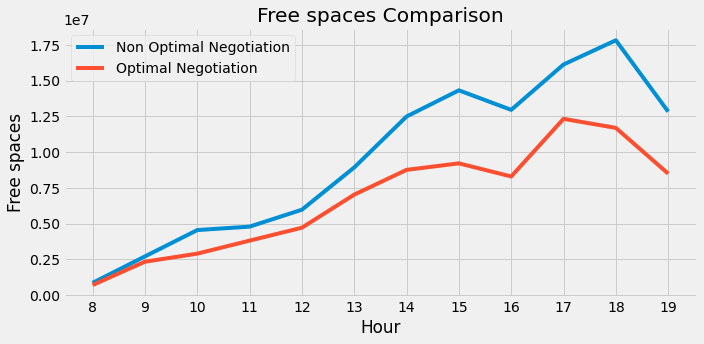

In [29]:
hours = sorted(list(df['EntHr'].unique()))  # separating unique hours
sum_of_free = list(np.zeros(len(hours)))  # creating an empty array for storing sum of idle vehicles in each hour

for hour in range(len(hours)):
    sum_of_free[hour] = numeric_df[numeric_df['EntHr'] == hours[hour]]['IdleT'].sum() 
    
    
hours = sorted(list(df['EntHr'].unique()))  # separating unique hours
sum_of_free_op = list(np.zeros(len(hours)))  # creating an empty array for storing sum of idle vehicles in each hour

for hour in range(len(hours)):
    sum_of_free_op[hour] = numeric_df_op[numeric_df_op['EntHr'] == hours[hour]]['IdleT'].sum() 
    
print(hours)
print(sum_of_free)
print(sum_of_free_op)

# plotting histogram for free spots per each hour
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,5))

plt.plot(hours, sum_of_free, label='Non Optimal Negotiation')
plt.plot(hours, sum_of_free_op, label='Optimal Negotiation')


plt.legend()
plt.xticks(ticks=hours)
plt.xlabel("Hour")
plt.ylabel("Free spaces")
plt.title("Free spaces Comparison")
plt.tight_layout()
plt.show() 

In [45]:
a = np.array(sum_of_free)
a = a / 1000
a = list(a)
for i in range(len(a)):
    a[i] = int(a[i])
max(a)

17830

In [43]:
b = np.array(sum_of_free_op)
b = b / 1000
b = list(b)
for i in range(len(b)):
    b[i] = int(b[i])
b

[694, 2328, 2893, 3804, 4710, 7025, 8758, 9214, 8296, 12330, 11697, 8495]

([<matplotlib.axis.XTick at 0x20af7eccac0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

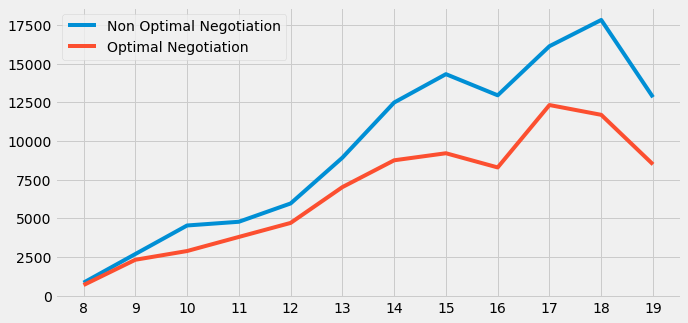

In [44]:
# plotting histogram for free spots per each hour
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,5))

plt.plot(hours, a, label='Non Optimal Negotiation')
plt.plot(hours, b, label='Optimal Negotiation')


plt.legend()
plt.xticks(ticks=hours)